In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import seaborn as sns

sns.set()
start = datetime.datetime(2015,1,1)
finish = datetime.datetime.now()

In [2]:
def bolinger_plot(stock):
    stock['Close: 200 Day Mean'] = stock['Close'].rolling(200).mean()
    # Upper = 20 MA + 2*std(20)
    stock['Upper'] = stock['Close: 200 Day Mean']+2*(stock['Close'].rolling(200).std())
    # Lower = 20 MA - 2*strd(20)
    stock['Lower'] = stock['Close: 200 Day Mean']-2*(stock['Close'].rolling(200).std())
    # Close
    stock[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])
    return

In [3]:
#Einzelwert
apple       = web.DataReader('AAPL','yahoo',start,finish)
wirecard    = web.DataReader('WDI.DE','yahoo',start,finish)
amzn        = web.DataReader('AMZN','yahoo',start,finish)
ibm         = web.DataReader('IBM','yahoo',start,finish)
tmv         = web.DataReader('TMV.DE','yahoo',start,finish)
cisco       = web.DataReader('CSCO','yahoo',start,finish)
rwe         = web.DataReader('RWE.DE','yahoo',start,finish)
applied_mat = web.DataReader('AMAT','yahoo',start,finish)
AMD         = web.DataReader('AMD','yahoo',start,finish)
hapaq       = web.DataReader('HLAG.DE','yahoo',start,finish)
toyota      = web.DataReader('TM','yahoo',start,finish)
eckert      = web.DataReader('EUZ.DE','yahoo',start,finish)
umicore     = web.DataReader('UMI.BR','yahoo',start,finish)


In [4]:
# Indices
dax = web.DataReader('^GDAXI','yahoo',start,finish)
volatility_index = web.DataReader('^VIX','yahoo',start,finish)
banken_index = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq = web.DataReader('^IXIC','yahoo',start,finish)

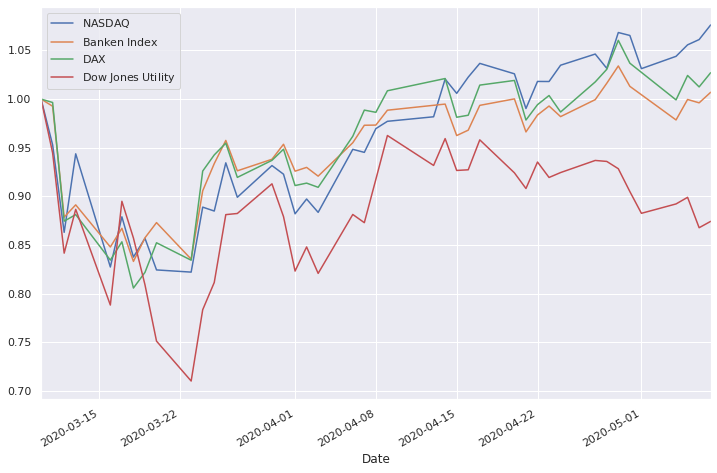

In [5]:
nasdaq['norm']=nasdaq['Close']['2020-03-10':]/nasdaq['Close']['2020-03-10']
banken_index['norm']=banken_index['Close']['2020-03-10':]/banken_index['Close']['2020-03-10']
dax['norm']=dax['Close']['2020-03-10':]/dax['Close']['2020-03-10']
dow_jones_utility['norm']=dow_jones_utility['Close']['2020-03-10':]/dow_jones_utility['Close']['2020-03-10']
nasdaq['norm']['2020-03-10':].plot(label='$\mathrm{NASDAQ}$',figsize=(12,8))
banken_index['norm']['2020-03-10':].plot(label='$\mathrm{Banken\; Index}$',figsize=(12,8))
dax['norm']['2020-03-10':].plot(label='$\mathrm{DAX}$',figsize=(12,8))
dow_jones_utility['norm']['2020-03-10':].plot(label='$\mathrm{Dow\; Jones\; Utility}$',figsize=(12,8))

plt.legend();

# relative Stärke

In [6]:
rel_st =[]
for stock_df in (apple,wirecard,amzn,ibm,tmv ,cisco,rwe,applied_mat,AMD,hapaq,toyota,eckert,umicore):
    stock_df['relative Stärke'] = stock_df['Close'].rolling(456).mean()
    stock_df['relative Stärke'] = stock_df['Close']*100/stock_df['relative Stärke']
    rel_st =  np.append(rel_st,stock_df['relative Stärke'][-1])

In [7]:
all_pos_rel = [apple['relative Stärke'],
                wirecard['relative Stärke'],
                amzn['relative Stärke'],
                ibm['relative Stärke'],
                cisco['relative Stärke'],
                rwe['relative Stärke'],
                applied_mat['relative Stärke'],
                AMD['relative Stärke'],
                toyota['relative Stärke'],
                eckert['relative Stärke'],
                umicore['relative Stärke']]
relative_staerke = pd.concat(all_pos_rel,axis = 1)
relative_staerke.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']
relative_staerke.tail()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore
Date,,,,,,,,,,,
2020-05-01,130.586077,NaN,125.154623,90.200433,85.449175,NaN,101.941877,158.351856,95.216796,NaN,NaN
2020-05-04,132.295733,64.177329,126.708962,90.093818,86.351926,107.514116,103.430250,166.439426,94.898655,116.758583,96.250477
2020-05-05,134.139921,63.636739,126.728747,90.795385,86.590049,111.911518,106.174947,164.859843,95.901252,126.220398,98.118473
2020-05-06,135.377599,59.888363,128.475301,91.266093,85.945093,111.189756,109.738349,164.356458,95.615523,124.965138,95.862037
2020-05-07,136.625833,61.374460,129.284239,89.863984,86.409047,112.017379,111.341916,163.295639,95.581503,133.346245,97.514825


# Normalize

In [8]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']
    
    

# Allocation

In [9]:
for stock_df , allo in list(zip((apple,
                                 wirecard,
                                 amzn,
                                 ibm,
                                 cisco,
                                 rwe,
                                 applied_mat,
                                 AMD,
                                 toyota,
                                 eckert,
                                 umicore),
                                [.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07])):
    stock_df['Allocation'] = stock_df['Normed Return']*allo


# Value

In [10]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Position Values'] = stock_df['Allocation']*25000

In [11]:
all_pos_vals = [apple['Position Values'],
                wirecard['Position Values'],
                amzn['Position Values'],
                ibm['Position Values'],
                cisco['Position Values'],
                rwe['Position Values'],
                applied_mat['Position Values'],
                AMD['Position Values'],
                toyota['Position Values'],
                eckert['Position Values'],
                umicore['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis = 1)

In [12]:
portfolio_val.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']

In [13]:

portfolio_val['Total Pos Sum'] = portfolio_val.sum(axis=1)
portfolio_dropna=portfolio_val.dropna()

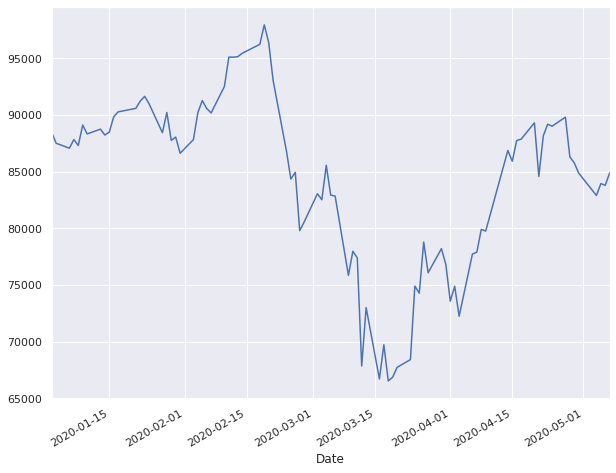

In [14]:
portfolio_dropna['Total Pos Sum']['2020-01-01':].plot(figsize=(10,8))


In [15]:
portfolio_val['Total Pos Sum'].argmin()

/home/dominik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2015-05-25 00:00:00')

In [16]:
print(portfolio_val['Total Pos Sum']['2015-05-25'])

2406.1831101387447


In [17]:
wirecard['Normed Return']

Date
2015-01-02    1.000000
2015-01-05    0.992919
2015-01-06    0.982088
2015-01-07    0.995140
2015-01-08    1.037212
                ...   
2020-04-30    2.510414
2020-05-04    2.452930
2020-05-05    2.429881
2020-05-06    2.284366
2020-05-07    2.338517
Name: Normed Return, Length: 1355, dtype: float64

In [18]:
portfolio_val.dropna()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Total Pos Sum
Date,,,,,,,,,,,,
2015-01-02,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,19250.000000
2015-01-05,1700.699688,1737.607742,1714.094785,1722.463869,1715.139370,1670.609362,1693.910308,1743.445699,1717.971735,1754.154584,1728.064820,18898.161962
2015-01-06,1700.859788,1718.654702,1674.956351,1685.317271,1714.505528,1656.298677,1630.108233,1723.782797,1700.286468,1560.274305,1721.377262,18486.421382
2015-01-07,1724.709566,1741.495455,1692.710496,1674.302786,1730.351235,1642.669342,1645.532865,1691.011138,1743.037320,1587.971588,1708.804723,18582.596513
2015-01-08,1790.976819,1815.120810,1704.281744,1710.693576,1743.661693,1678.105510,1698.117001,1710.674040,1776.597489,1606.436268,1739.834986,18974.499936
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,4702.734565,4393.224383,14033.126391,1355.855850,2686.164441,1788.161957,3483.173226,34338.013600,1721.035225,12159.060701,4216.906247,84877.456587
2020-05-04,4692.490605,4292.627337,13136.855397,1313.957816,2620.879961,1745.911251,3335.937751,34449.438118,1680.790942,11762.068244,3874.503221,82905.460644
2020-05-05,4762.919482,4252.291228,13147.122488,1323.676456,2627.852111,1818.146417,3424.979987,34206.926961,1698.336926,12740.701713,3946.194049,83949.147819


In [19]:
stocks = pd.concat([apple['Close'],
                    wirecard['Close'],
                    amzn['Close'],
                    ibm['Close'],
                    cisco['Close'],
                    rwe['Close'],
                    applied_mat['Close'],
                    AMD['Close'],
                    toyota['Close'],
                    eckert['Close'],
                    umicore['Close'],
                    tmv['Close'],
                    hapaq['Close']],axis=1)
stocks.columns = ['Apple',
                  'Wirecard',
                  'Amazon',
                  'IBM',
                  'Cisco',
                  'RWE',
                  'Applied Materials',
                  'Advanced Micro',
                  'Toyota',
                  'Eckert und Ziegler',
                  'Umicore',
                  'Teamviewer',
                  'Hapaq Loyd']

In [20]:
stocks.pct_change(1).mean()

Apple                 0.000899
Wirecard              0.001053
Amazon                0.001657
IBM                  -0.000092
Cisco                 0.000429
RWE                   0.000302
Applied Materials     0.000808
Advanced Micro        0.002942
Toyota                0.000055
Eckert und Ziegler    0.001777
Umicore               0.000786
Teamviewer            0.003938
Hapaq Loyd            0.002143
dtype: float64

In [21]:
log_return = np.log(stocks/stocks.shift(1))

In [22]:
#log_return.hist(bins=100,figsize=(30,16))
#plt.tight_layout

In [23]:
from pandas.plotting import scatter_matrix
#scatter_matrix(stocks,figsize=(30,30),alpha=0.2,hist_kwds={'bins':50});

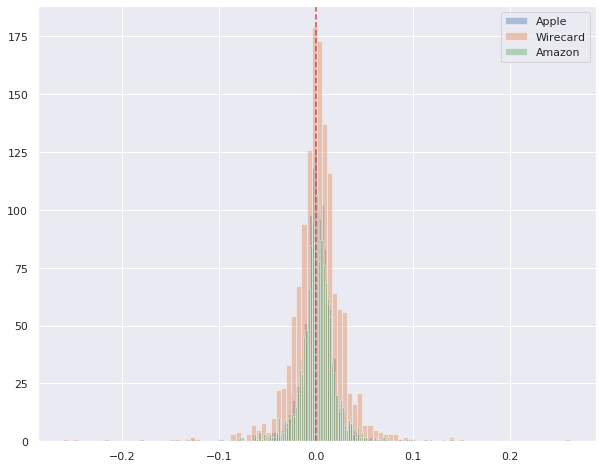

In [24]:


apple['Close'].pct_change(1).hist(bins=100,label='Apple',figsize=(10,8),alpha=0.4)
wirecard['Close'].pct_change(1).hist(bins=100,label='Wirecard',figsize=(10,8),alpha=0.4)
amzn['Close'].pct_change(1).hist(bins=100,label='Amazon',figsize=(10,8),alpha=0.4)
plt.axvline(0.0, c='r', ls='--')
plt.legend()

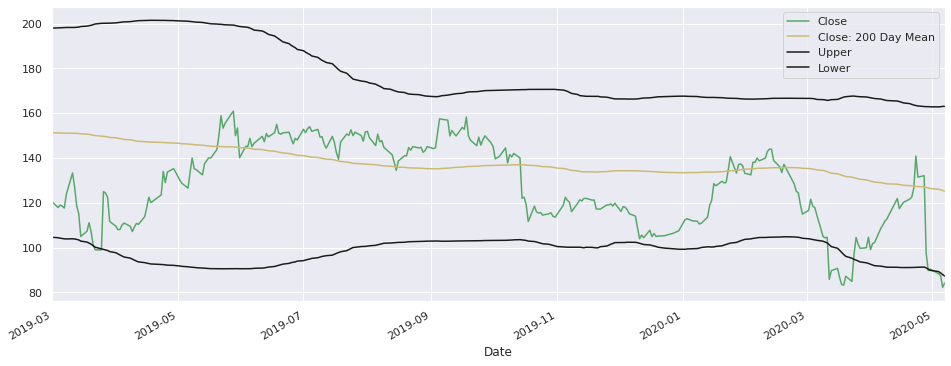

In [25]:

bolinger_plot(wirecard)

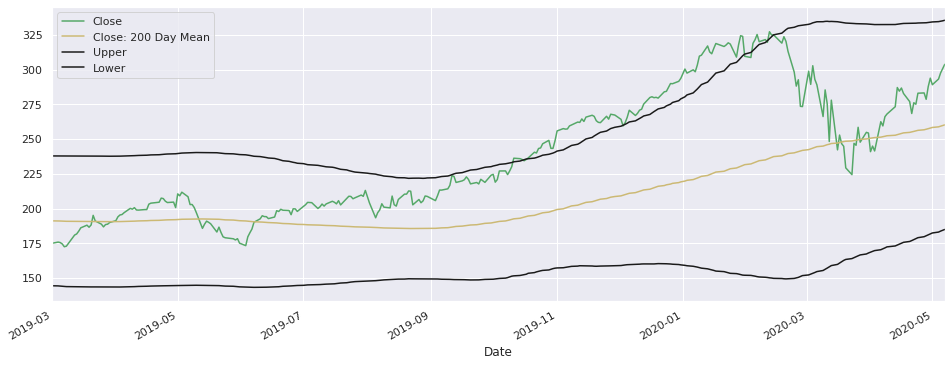

In [26]:
bolinger_plot(apple)

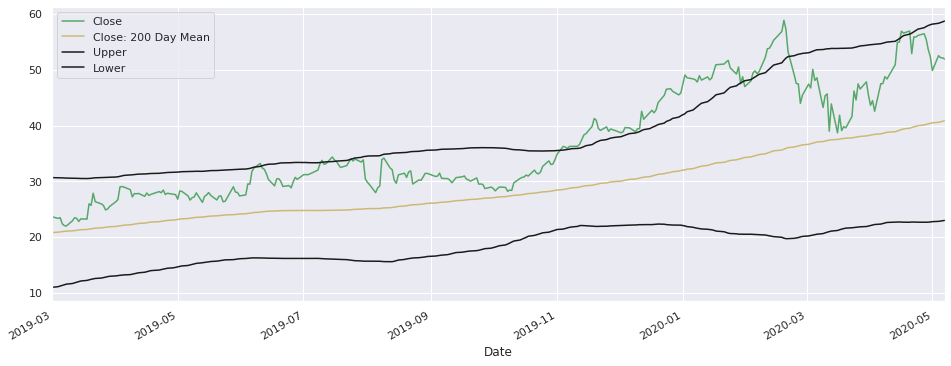

In [27]:
bolinger_plot(AMD)

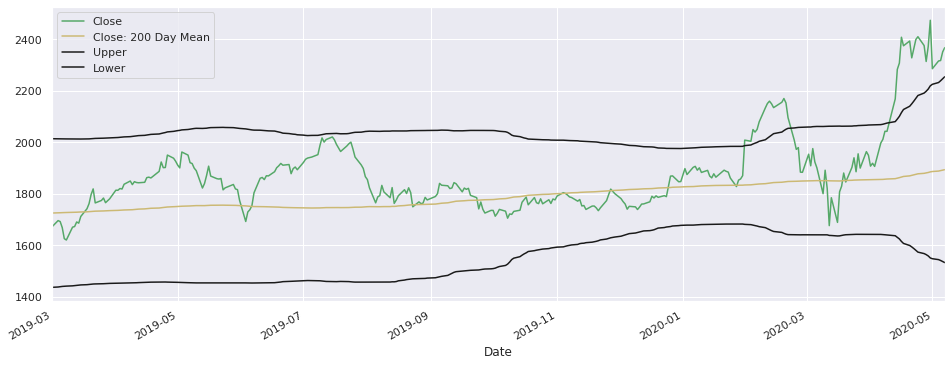

In [28]:
bolinger_plot(amzn)

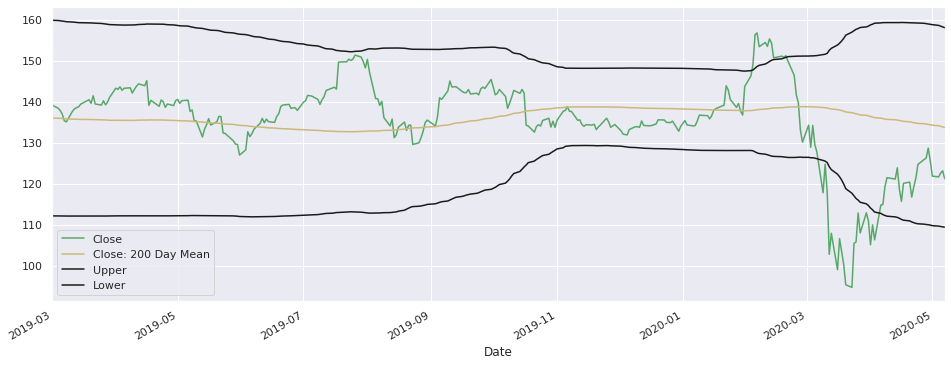

In [29]:
bolinger_plot(ibm)

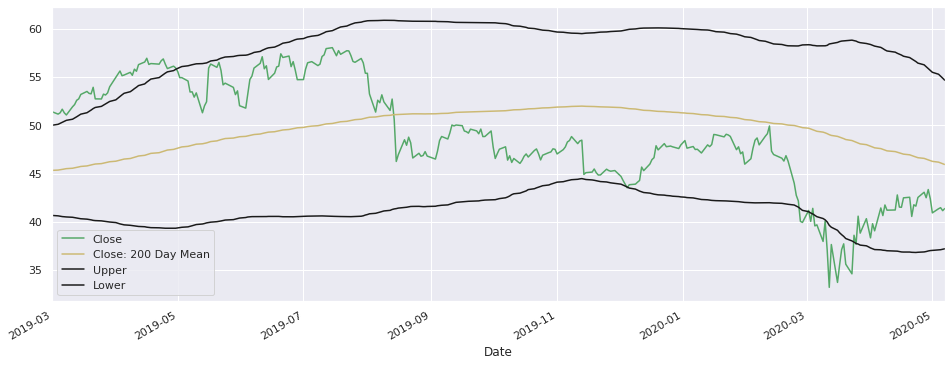

In [30]:
bolinger_plot(cisco)

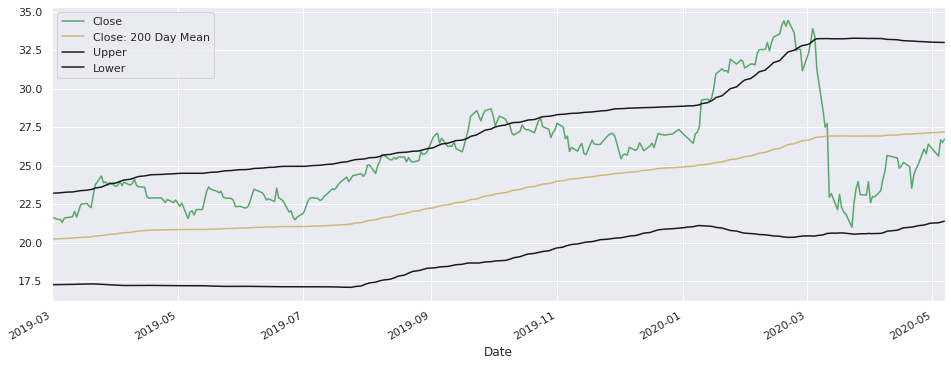

In [31]:
bolinger_plot(rwe)

In [32]:
delta     = web.DataReader('DAL','yahoo',start,finish)


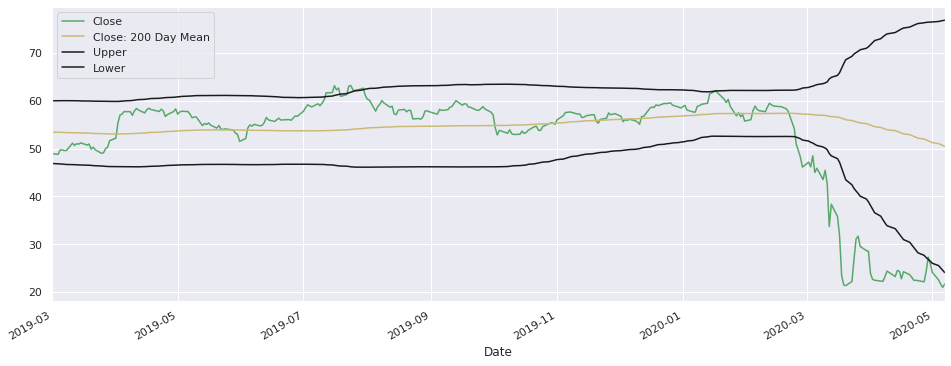

In [33]:
bolinger_plot(delta)

In [34]:
verlust_corona = -23836.64
